In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [1]:
%cd drive/My\ Drive/YOLOv3

/content/drive/My Drive/YOLOv3


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from class_yolov3 import YOLOv3, decode
import utils
import postprocess
import cv2

#----------------------------------------------------------------
#   build model and load the saved weights
#
def get_inference_model(input_shape=(416, 416, 3)):
    input_layer  = tf.keras.layers.Input(shape=input_shape)
    YOLO = YOLOv3() # create an instance
    feature_maps = YOLO(input_layer)

    predictions = []
    for i, fm in enumerate(feature_maps):
        pred_tensor = decode(fm, i)
        predictions.append(pred_tensor)

    inference_model = tf.keras.Model(input_layer, predictions)
    #----------------------------------------------------------------
    # A> use the fully trained weights from yunyang
    utils.load_weights(inference_model, "./yolov3.weights")# TF native format
    #----------------------------------------------------------------
    # B> use the weights  partly trained on google colab
    #inference_model.load_weights("./yolov3_weights20_iou.h5")# h5 format
    return inference_model

inference_model = get_inference_model()


oimage_size : (426, 640)
pred_bbox.shape : (10647, 85)
tf.Tensor(
[[  0.78871536  73.407715   108.56679    282.97958   ]
 [190.88255    129.2203     204.75246    169.42319   ]
 [ 37.073868   242.34604    235.27562    319.57852   ]
 [211.8836     130.8171     223.65942    165.88692   ]
 [208.17128    130.09056    220.82884    165.85854   ]
 [196.82466    129.58743    207.82225    166.66315   ]
 [175.28186    129.53366    187.28058    167.09921   ]
 [179.25987    131.13042    192.26872    167.62428   ]], shape=(8, 4), dtype=float32)
tf.Tensor([ 1  0 16  0  0  0  0  0], shape=(8,), dtype=int64)


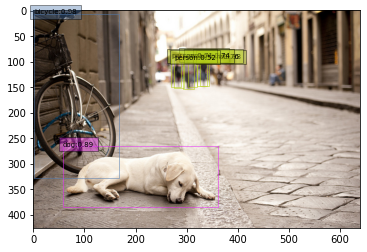

In [3]:
# A: yolov3.weights
score_threshold = 0.5 
iou_threshold = 0.6
max_detections = 20
##image_path = "images/kite.jpg"
image_path = "images/dog.jpg"
oimage      = cv2.imread(image_path) # read image as nparray
oimage      = cv2.cvtColor(oimage, cv2.COLOR_BGR2RGB)
oimage_size = oimage.shape[:2]
# image_data : resized 416x416 and RGB vals/255.0
# pad to get 416x416 size of image  with no jitter
image_data, _, _, _= utils.resize_and_pad_image(oimage, jitter=False)
oimage_size =  oimage.shape[:2]
print('oimage_size :', oimage_size)
image_data = image_data/255.0
bboxes = postprocess.detections(inference_model, image_data, oimage_size)
%matplotlib inline
postprocess.display_detections(oimage, bboxes)
